In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scipy
from scipy.constants import hbar

π = np.pi
µs_to_ns = 1e3
norm_fact = 1/(np.sqrt(2))

In [2]:
num_qubit_states = 3

g_state = qt.basis(num_qubit_states, 0)
e_state = qt.basis(num_qubit_states, 1)
f_state = qt.basis(num_qubit_states, 2)

In [3]:
b1 = qt.tensor(qt.destroy(num_qubit_states), qt.qeye(num_qubit_states))
b1dag = b1.dag() 
b2 = qt.tensor(qt.qeye(num_qubit_states), qt.destroy(num_qubit_states))
b2dag = b2.dag() 

In [4]:
gg_proj = qt.tensor(g_state, g_state).proj()
ge_proj = qt.tensor(g_state, e_state).proj()
gf_proj = qt.tensor(g_state, f_state).proj()

eg_proj = qt.tensor(e_state, g_state).proj()
ee_proj = qt.tensor(e_state, e_state).proj()
ef_proj = qt.tensor(e_state, f_state).proj()

fg_proj = qt.tensor(f_state, g_state).proj()
fe_proj = qt.tensor(f_state, e_state).proj()
ff_proj = qt.tensor(f_state, f_state).proj()

### Hamiltonian
$H/\hbar = \sum_{i=1}^2{\left(\omega_i b_i^\dagger b_i + \frac{\alpha_i}{2} b_i^\dagger b_i^\dagger b_i b_i\right)} + J(b_1^\dagger b_2+b_2^\dagger b_1+b_1^\dagger b_2^\dagger+b_1 b_2)$

In [5]:
def hamiltonian(omega_1, omega_2, alpha_1, alpha_2, J_coupling):
    t1 = (omega_1 * b1dag * b1) + (omega_2 * b2dag * b2)
    t2 = (alpha_1 / 2 * b1dag * b1dag * b1 * b1) + (alpha_2 / 2 * b2dag * b2dag * b2 * b2)
    t4 = J_coupling * (b1dag * b2 + b2dag * b1)
    t5 = J_coupling * (b1dag * b2dag + b1 * b2)
    return t1 + t2 + t4 + t5

In [6]:
J_coupling = 2*π * 8
t_start = 0
t_end = 6 * π/(4*J_coupling) #π/4J ~ reach maximally entangled state (Jt = π/4)
t_vec = np.linspace(t_start, t_end, 601)

Calculate gate time

0.0


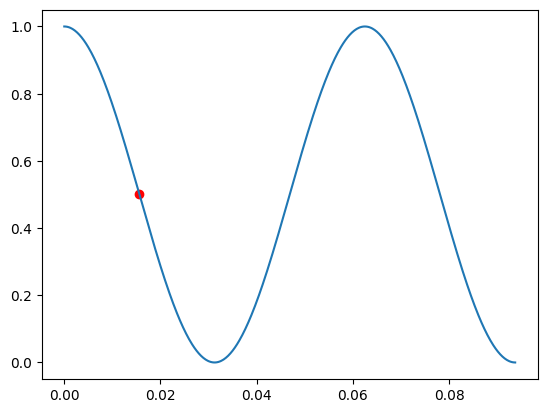

In [7]:
omega1 = 2*π * 6000
omega2 = 2*π * 6000
alpha = 2*π * -300

h = hamiltonian(omega_1=omega1, omega_2=omega2, alpha_1=alpha, alpha_2=alpha, J_coupling=J_coupling)

psi0 = qt.tensor(e_state, g_state)
te = qt.mesolve(h, psi0, t_vec, [], [])

eg_pops = qt.expect(eg_proj, te.states)
#argument of value closest to 0.5
argmin = np.argmin(np.abs(eg_pops-0.5)[1:]) + 1
plt.plot(t_vec, eg_pops)
plt.scatter(t_vec[argmin], eg_pops[argmin], c='r')
newt_vec = np.linspace(t_start, t_vec[argmin], 601)

#note in 2010 Nature Paper Bialczak g/2 = J
print(J_coupling * newt_vec[-1] - π/4) #SQiSW ==> gt = π/2, Jt = π/4, if print is 0 we are okay!

### On Resonance

In [8]:
omega1 = 2*π * 6000
omega2 = 2*π * 6000
alpha = 2*π * -300

h = hamiltonian(omega_1=omega1, omega_2=omega2, alpha_1=alpha, alpha_2=alpha, J_coupling=J_coupling)

Propogator function for specific hamiltonian

In [9]:
propogator = qt.propagator(h, newt_vec)
propogator[-1]

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = False
Qobj data =
[[ 9.99998978e-01+5.23637260e-04j  0.00000000e+00+0.00000000e+00j
  -3.20725977e-05-2.23776364e-05j  0.00000000e+00+0.00000000e+00j
  -1.32929080e-03+5.59798158e-05j  0.00000000e+00+0.00000000e+00j
  -3.20725977e-05-2.23776364e-05j  0.00000000e+00+0.00000000e+00j
   1.15340386e-06+2.66813092e-07j]
 [ 0.00000000e+00+0.00000000e+00j -7.58613035e-04+7.07105191e-01j
   0.00000000e+00+0.00000000e+00j  7.07106607e-01+7.59289937e-04j
   0.00000000e+00+0.00000000e+00j  9.57109483e-07-6.92549454e-04j
   0.00000000e+00+0.00000000e+00j -3.17488845e-04+8.91297732e-04j
   0.00000000e+00+0.00000000e+00j]
 [-3.20434465e-05-2.23572971e-05j  0.00000000e+00+0.00000000e+00j
   3.41792646e-01+9.36949555e-01j  0.00000000e+00+0.00000000e+00j
  -4.87932685e-02-3.26531448e-02j  0.00000000e+00+0.00000000e+00j
  -4.10467728e-02+1.31346346e-02j  0.00000000e+00+0.00000000e+00j
   7.18244746e-05+4.85917281e-05j]
 [ 0.0

In [10]:
propogator[-1]

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = False
Qobj data =
[[ 9.99998978e-01+5.23637260e-04j  0.00000000e+00+0.00000000e+00j
  -3.20725977e-05-2.23776364e-05j  0.00000000e+00+0.00000000e+00j
  -1.32929080e-03+5.59798158e-05j  0.00000000e+00+0.00000000e+00j
  -3.20725977e-05-2.23776364e-05j  0.00000000e+00+0.00000000e+00j
   1.15340386e-06+2.66813092e-07j]
 [ 0.00000000e+00+0.00000000e+00j -7.58613035e-04+7.07105191e-01j
   0.00000000e+00+0.00000000e+00j  7.07106607e-01+7.59289937e-04j
   0.00000000e+00+0.00000000e+00j  9.57109483e-07-6.92549454e-04j
   0.00000000e+00+0.00000000e+00j -3.17488845e-04+8.91297732e-04j
   0.00000000e+00+0.00000000e+00j]
 [-3.20434465e-05-2.23572971e-05j  0.00000000e+00+0.00000000e+00j
   3.41792646e-01+9.36949555e-01j  0.00000000e+00+0.00000000e+00j
  -4.87932685e-02-3.26531448e-02j  0.00000000e+00+0.00000000e+00j
  -4.10467728e-02+1.31346346e-02j  0.00000000e+00+0.00000000e+00j
   7.18244746e-05+4.85917281e-05j]
 [ 0.0

In [117]:
def diagonalize(matrix):
    eig, eigstates = matrix.eigenstates()
    obj = (
        np.array(eigstates[0]), np.array(eigstates[1]), np.array(eigstates[2]), 
        np.array(eigstates[3]), np.array(eigstates[4]), np.array(eigstates[5]),
        np.array(eigstates[6]), np.array(eigstates[7]), np.array(eigstates[8]),
    )
    U = np.column_stack(obj)
    T = qt.Qobj(U)
    D = qt.Qobj(np.diag(eig))
    Tinv = qt.Qobj.inv(T)
    diagonalh = Tinv * D * T
    
    H_compbasis = qt.Qobj(np.diag((diagonalh[0,0], diagonalh[1,1], diagonalh[3,3], diagonalh[4,4])))
    
    return diagonalh, H_compbasis

In [125]:
x1, x2 = diagonalize(propogator[-1])
y1, y2 = diagonalize(h)

In [130]:
x2

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.30314165+0.95218267j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.54751668-0.10786571j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.54459285+0.81583874j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.1460799 +0.827059j  ]]

Diagonalize time independent hamiltonian

Change to $|g, g\rangle, |g, e\rangle, |e, g\rangle, |e, e\rangle$ Basis

In [102]:
H_compbasis = qt.Qobj(np.diag((diagonalh[0,0], diagonalh[1,1], diagonalh[3,3], diagonalh[4,4])))
H_compbasis

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-8.37592333e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.55783848e+04  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.44280259e+04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.44306132e+04]]

What I expect...

In [109]:
qt.Qobj(np.diag((1, np.exp(1j*π/4), np.exp(1j*π/4), 1)))

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]

Reminder of 3 Level Basis Choice

In [62]:
psi0 = qt.tensor(g_state, g_state)
psi1 = qt.tensor(g_state, e_state)
psi2 = qt.tensor(g_state, f_state)
psi3 = qt.tensor(e_state, g_state)
psi4 = qt.tensor(e_state, e_state)
psi5 = qt.tensor(e_state, f_state)
psi6 = qt.tensor(f_state, g_state)
psi7 = qt.tensor(f_state, e_state)
psi8 = qt.tensor(f_state, f_state)


print(psi0[0], psi1[1], psi2[2], psi3[3], psi4[4], psi5[5], 
      psi6[6], psi7[7], psi8[8])

[[1.+0.j]] [[1.+0.j]] [[1.+0.j]] [[1.+0.j]] [[1.+0.j]] [[1.+0.j]] [[1.+0.j]] [[1.+0.j]] [[1.+0.j]]


In [11]:
#some edit